In [3]:
import sys
sys.path.append(".//")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from leaf.leafarea import*

# Parameter 불러오기

In [8]:
leaf_params = pd.read_excel(".//data_input//leaf_params.xlsx", index_col = "Cultivar") # csv 파일의 경우 pd.read_csv
leaf_params = leaf_params.loc["Total"] # 품종별로 선택하여 불러오기
leaf_params = leaf_params.values
leaf_params

array([-12.8336,   2.0435,   2.0115,   1.1497,   0.6503])

# Data 불러오기

In [9]:
leaf_df = pd.read_excel(".//data_input//leafarea_model.xlsx", index_col="No")
leaf_df

CW    LL
No              
1     6.85   6.8
2     6.50   7.0
3     5.50   7.3
4     8.50   8.2
5     9.80  10.8
..     ...   ...
396  10.20  11.3
397   8.20  11.5
398   9.40  10.2
399   8.60   9.2
400  11.00  11.8

[400 rows x 2 columns]

# Estimation

In [10]:
estimate_leaf =  leaf(leaf_params)

In [15]:
leafarea, No = estimate_leaf.run(leaf_df.values)
#output_df = pd.DataFrame([No, leafarea])
output_df = pd.DataFrame([No, leafarea]).T
output_df.columns = ["No", "leafarea"]
output_df["No"] = output_df["No"].astype(int)
output_df = output_df.set_index("No")     

In [16]:
output_df

leafarea
No             
1     98.859245
2     94.969175
3     82.522512
4    147.822447
5    215.185080
..          ...
396  233.391645
397  190.363353
398  196.137304
399  163.319504
400  263.042072

[400 rows x 1 columns]

In [17]:
output_df.to_excel(".//results//leaf_estimation.xlsx")

# 설향 품종 이용하기

In [9]:
# leaf_params = pd.read_excel(".//data_input//leaf_params.xlsx", index_col = "Cultivar")
# leaf_params = leaf_params.loc["Seol"]

In [10]:
# leaf_params # 이후 위의 과정 반복 진행

# 시각화

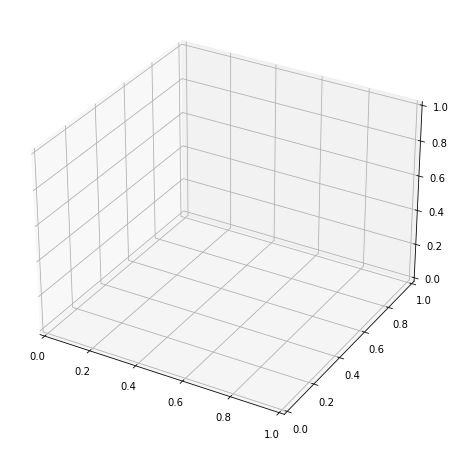

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection="3d")

In [19]:
def A(data):
    
    x = []
    y = []

    for i in data:
        x.append(i[0])
        y.append(i[1])
    return x, y

def B(data):
    
    x = []
    
    for i in data:
        x.append(i[0])
    return x

x, y = A(leaf_df.values)
#z = B(output_df.values)
x = np.array(x)
y = np.array(y)
x, y = np.meshgrid(x,y)
z = estimate_leaf.area(x,y)

ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=False)

ax.set_title("leafarea", fontsize=24)
ax.set_xlabel("CW (cm)", fontsize=16)
ax.set_ylabel("LL (cm)", fontsize=16)
ax.set_zlabel("Estimated (cm^2)", fontsize=16)

Text(0.09702565402402048, 0.01299897282041881, 'Estimated (cm^2)')

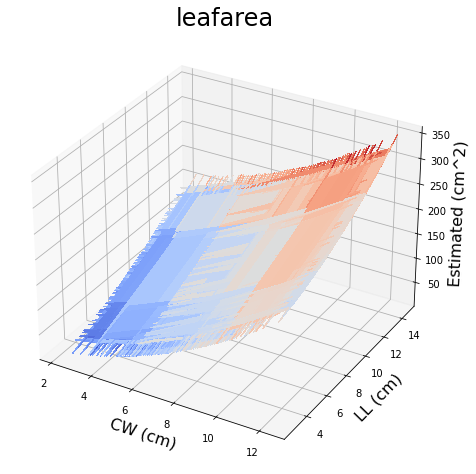

In [20]:
fig

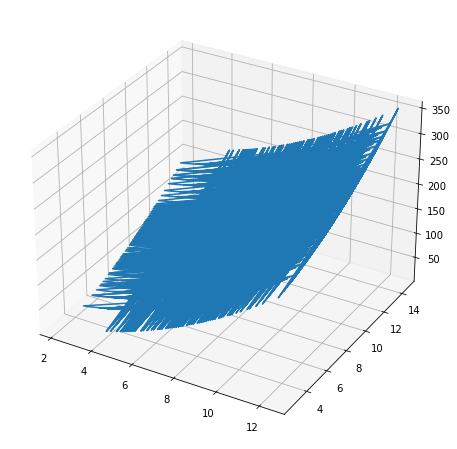

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection="3d")
ax = ax.plot_wireframe(x, y, z, rstride=4, cstride=4)

Text(0.5, 0, 'Estimated (cm^2)')

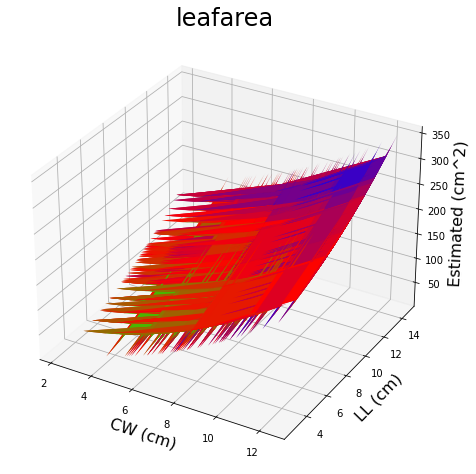

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.plot_surface(x, y, z, cmap="brg_r")
ax.set_title("leafarea", fontsize=24)
ax.set_xlabel("CW (cm)", fontsize=16)
ax.set_ylabel("LL (cm)", fontsize=16)
ax.set_zlabel("Estimated (cm^2)", fontsize=16)

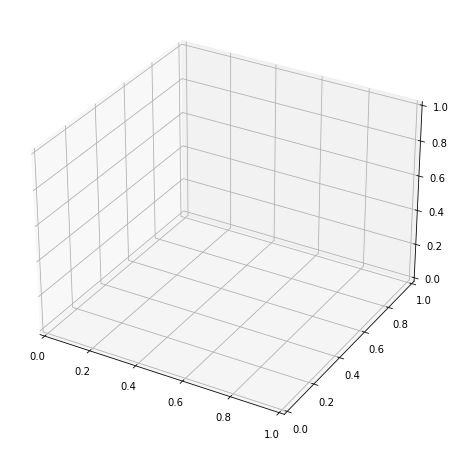

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection="3d")
x, y = A(leaf_df.values)
z = B(output_df.values)

In [22]:
ax.plot(x,y,z, linestyle="none", marker="o", mfc="none", markeredgecolor="red")

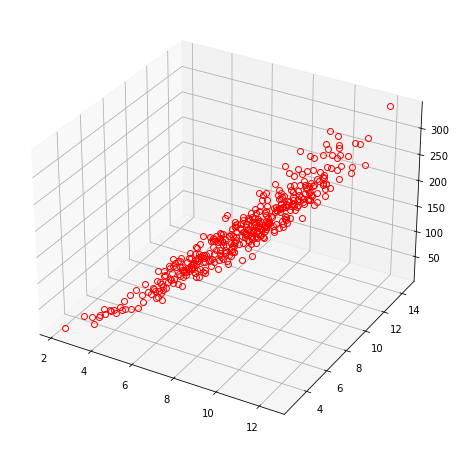

In [23]:
fig

In [24]:
fig.savefig('.//results//results.png')